#### **1. Tokenization**
Tokenization is typically the first step in any text processing or analysis task. It involves splitting a text string into smaller units called tokens, which can be words, phrases, symbols, or other meaningful elements. For example, the sentence “Hello world! This is a test.” can be broken down into ["Hello", "world", "!", "This", "is", "a", "test", "."]. Tokenization helps organize text data in a structured way, making it easier to perform subsequent operations such as word frequency calculations or feature extraction.

#### **2. Stop Word Removal**
Stop words are commonly used words (like “the,” “is,” and “and”) that don’t contribute much to the core meaning of a text. Because they appear frequently, they can dominate or distort the results of text analysis if not removed. By filtering out stop words, you can focus on the more meaningful words that help distinguish one document from another, ultimately improving the performance of your text-based models.

#### **3. TF-IDF Vectorization**
TF-IDF (Term Frequency - Inverse Document Frequency) is a method for evaluating the importance of words in a collection of documents:

-   Term Frequency (TF) measures how often a word appears in a single document.
-   Inverse Document Frequency (IDF) measures how rare or unique a word is across all documents in the dataset.  

A word that appears frequently in one document but rarely across all other documents will have a high TF-IDF score. This approach helps emphasize terms that are particularly characteristic of individual documents. Once the TF-IDF values are calculated, each document can be represented as a vector, which can then be used as input for various machine learning tasks such as classification or clustering.

In [19]:
import pandas as pd
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Download NLTK resources if needed
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/liulang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liulang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text

In [20]:
# Read CSV file
df = pd.read_csv("./data/Training_Essay_Data.csv")

print(df.head())

                                                text  generated
0  Car-free cities have become a subject of incre...          1
1  Car Free Cities  Car-free cities, a concept ga...          1
2    A Sustainable Urban Future  Car-free cities ...          1
3    Pioneering Sustainable Urban Living  In an e...          1
4    The Path to Sustainable Urban Living  In an ...          1


In [21]:
# Prepare stop words
stop_words = set(stopwords.words("english"))

print(stop_words)

{'further', 'yourself', "i'm", 'with', 'y', 'this', "don't", "that'll", "they'll", 'll', 'himself', 'then', 'at', 'wasn', "mightn't", 'above', 'both', 'other', "we've", "should've", 'its', "mustn't", 'have', 'of', 'before', 'below', 'is', 'we', 'o', "we'll", "they'd", "hasn't", "isn't", 'to', 'don', "we're", 'did', "she'd", "aren't", 'are', 'very', 'after', 'between', 'again', 'in', 'myself', "she'll", 'there', 'yours', "shouldn't", 'same', 'when', 'how', 'ma', 'couldn', 'not', "they've", 'so', 'm', 'do', 'too', "we'd", "i'll", 'under', 'into', 'who', 'my', 'been', 'by', 'ain', "he's", 'your', 'on', 'can', 'only', 'because', 's', 'mustn', 'itself', 'nor', 'from', 'some', "you'd", 'off', 'all', 'while', 't', 'her', 'i', 'no', 'herself', 'haven', 'about', 'where', 'here', "didn't", "he'll", "wouldn't", 'what', 'doing', 'through', 'each', 'which', "you've", "she's", 'does', 'him', 'were', 'our', "doesn't", "weren't", 'mightn', 'or', 'as', 'now', 'these', "won't", 'such', 'they', 'aren', '

In [22]:
# Define a custom tokenizer function
#    This will perform tokenization and stop word removal
def custom_tokenizer(text):

    # Tokenize the text
    tokens = wordpunct_tokenize(text)
    
    # Keep only alphabetic tokens and convert them to lowercase
    tokens = [token.lower() for token in tokens if token.isalpha()]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    return tokens

In [23]:
# Split features and labels
X = df["text"]        # Essay text
y = df["generated"]   # 0: Human-written, 1: AI-generated

print(len(X))
print(len(y))

29145
29145


In [24]:
# Create TF-IDF vectorizer with the custom tokenizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

In [25]:
# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

print(X_tfidf.shape)

/Users/liulang/gitrepo/iit/ai_text_classfier/.venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(29145, 70052)


In [26]:
# Split the dataset: 70% for training, and the remaining 30% equally split into 15% validation and 15% test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_tfidf, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("\nTraining data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)


Training data shape: (20401, 70052)
Validation data shape: (4372, 70052)
Test data shape: (4372, 70052)


In [27]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42, verbose=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, verbose=1)

In [28]:
# Predictions and accuracy evaluation

# Training data accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining data accuracy:", train_accuracy)

# Validation data accuracy
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation data accuracy:", val_accuracy)

# Test data accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test data accuracy:", test_accuracy)


Training data accuracy: 0.9911769030929857
Validation data accuracy: 0.9867337602927722
Test data accuracy: 0.9871912168344007


In [29]:
# Train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [30]:
# Evaluate the model

# Evaluate on the training data
y_train_pred = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining data accuracy:", train_accuracy)

# Evaluate on the validation data
y_val_pred = nb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation data accuracy:", val_accuracy)

# Evaluate on the test data
y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test data accuracy:", test_accuracy)


Training data accuracy: 0.9729425028184893
Validation data accuracy: 0.9709515096065874
Test data accuracy: 0.9700365965233303


In [34]:
# Test with an arbitrary text input and print the predicted probabilities for each class
test_text = """
A solar eclipse occurs when the Moon blocks the Sun's light, casting a shadow on Earth; it happens during a new moon and is visible from a small area. A lunar eclipse happens when Earth blocks sunlight from reaching the Moon, casting a shadow on it; it occurs during a full moon and is visible from a large area.
"""

# Transform the test text into TF-IDF features using the already-fitted vectorizer
test_text_tfidf = tfidf_vectorizer.transform([test_text])

# Predict the label for the arbitrary text input
predicted_label = nb_model.predict(test_text_tfidf)[0]

# Get the predicted probabilities for each class (0: Human, 1: AI)
predicted_probabilities = nb_model.predict_proba(test_text_tfidf)[0]

# Map the numeric label to a string for readability
label_map = {0: "Human", 1: "AI"}

print("\nArbitrary text input:")
print(test_text)
print("\nPredicted label:", label_map[predicted_label])
print("Probability of being Human: {:.2f}".format(predicted_probabilities[0]))
print("Probability of being AI: {:.2f}".format(predicted_probabilities[1]))



Arbitrary text input:

A solar eclipse occurs when the Moon blocks the Sun's light, casting a shadow on Earth; it happens during a new moon and is visible from a small area. A lunar eclipse happens when Earth blocks sunlight from reaching the Moon, casting a shadow on it; it occurs during a full moon and is visible from a large area.


Predicted label: Human
Probability of being Human: 0.83
Probability of being AI: 0.17


# Evaluating on Independent Set 


In [33]:
df_ind = pd.read_csv("./data/independent_dataset.csv")

print(df_ind.head())

X_ind = df_ind["text"]        # Essay text
y_ind = df_ind["generated"]   # 0: Human-written, 1: AI-generated

print(len(X_ind))
print(len(y_ind))

X_ind_tfidf = tfidf_vectorizer.transform(X_ind)

y_ind_pred = nb_model.predict(X_ind_tfidf)
test_accuracy = accuracy_score(y_ind, y_ind_pred)
print("NB model against independent set accuracy:", test_accuracy)

y_ind_pred = model.predict(X_ind_tfidf)
test_accuracy = accuracy_score(y_ind, y_ind_pred)
print("LR model against independent set accuracy:", test_accuracy)

                                                text  generated
0  A solar eclipse occurs when the Moon blocks th...          1
1  Leap years keep our calendar aligned with Eart...          1
2  Northern Lights, or Aurora Borealis, occur whe...          1
3  Photosynthesis converts sunlight, water, and c...          1
4  The Rosetta Stone provided the key to decipher...          1
100
100
NB model against independent set accuracy: 0.54
LR model against independent set accuracy: 0.51


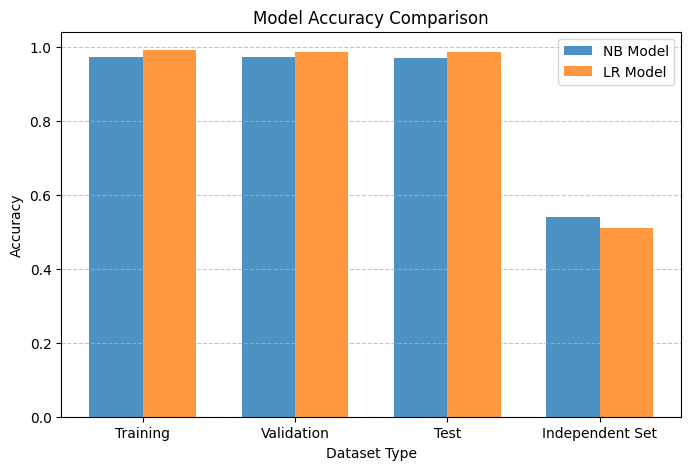

In [37]:
# model name: [training data accuracy, validation data accuracy, test data accuracy]
import numpy as np
import matplotlib.pyplot as plt

# 数据
models = {
    "NB Model": [0.973, 0.971, 0.970, 0.540],
    "LR Model": [0.991, 0.987, 0.987, 0.510]
}
labels = ["Training", "Validation", "Test", "Independent Set"]

# 设置
x = np.arange(len(labels))
width = 0.35  # 柱状图宽度

fig, ax = plt.subplots(figsize=(8, 5))
for i, (model, values) in enumerate(models.items()):
    ax.bar(x + i * width, values, width, label=model, alpha=0.8)

# 美化
ax.set_xlabel("Dataset Type")
ax.set_ylabel("Accuracy")
ax.set_title("Model Accuracy Comparison")
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
